# 95-865: Topic Modeling with Latent Dirichlet Allocation

Author: George H. Chen (georgechen [at symbol] cmu.edu)

The beginning part of this demo is a shortened and modified version of sklearn's LDA & NMF demo (http://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html).

We'll use NumPy.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=5, suppress=True)

## Latent Dirichlet Allocation

We first load in 10,000 posts from the 20 Newsgroups dataset.

In [2]:
from sklearn.datasets import fetch_20newsgroups
num_articles = 10000
data = fetch_20newsgroups(shuffle=True, random_state=0,
                          remove=('headers', 'footers', 'quotes')).data[:num_articles]

In [3]:
type(data[0])

str

We can verify that there are 10,000 posts, and we can look at an example post.

In [5]:
# you can take a look at what individual documents look like by replacing what index we look at
print(data[1])

Heres a story of a Saint that people might like to read. I got it from
a The Morning Star, and am posting it with the permission of the
editor.


    Saint Aloysius Gonzaga

    The Patron of Youth


    The marquis Gonzaga had high aspirations for his son, the  Prince
    Gonzage.  He  wanted  him  to become a famous, brave and honoured
    soldier. After all, he must carry on the  great  family  name  of
    Gonzaga.  Of  course, he was to become far more famous, brave and
    honoured than his father could ever have imagined; though not  in
    the manner expected.

    Saint Aloysius' mother was a woman who received immense joy  from
    praying  to  God  and  meditating on the divine mysteries and the
    life of Our Lord. She had little time for the pleasures  of  this
    life.  As  Saint  Aloysius	grew, he began to resemble his mother
    more than his father.

    Saint Aloysius had learned numerous expressions from his father's
    soldiers,  but the moment he discovered that

We now fit a `CountVectorizer` model that will compute, for each post, what its raw word count histograms are (the "term frequencies" we saw in week 1).

The output of the following cell is the term-frequencies matrix, where rows index different posts/text documents, and columns index 1000 different vocabulary words. A note about the arguments to `CountVectorizer`:

- `max_df`: we only keep words that appear in at most this fraction of the documents
- `min_df`: we only keep words that appear in at least this many documents
- `stop_words`: whether to remove stop words
- `max_features`: among words that don't get removed due to the above 3 arguments, we keep the top `max_features` number of most frequently occuring words

In [6]:
vocab_size = 1000
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer does tokenization and can remove terms that occur too frequently, not frequently enough, or that are stop words

# document frequency (df) means number of documents a word appears in
tf_vectorizer = CountVectorizer(max_df=0.95,
                                min_df=2,
                                stop_words='english',
                                max_features=vocab_size)
tf = tf_vectorizer.fit_transform(data)

We can verify that there are 10,000 rows (corresponding to posts), and 1000 columns (corresponding to words).

In [7]:
tf.shape

(10000, 1000)

A note about the `tf` matrix: this actually is stored as what's called a sparse matrix (rather than a 2D NumPy array that you're more familiar with). The reason is that often these matrices are really large and the vast majority of entries are 0, so it's possible to save space by not storing where the 0's are.

In [8]:
type(tf)

scipy.sparse._csr.csr_matrix

 To convert `tf` to a 2D NumPy table, you can run `tf.toarray()` (this does not modify the original `tf` variable).

In [9]:
type(tf.toarray())

numpy.ndarray

In [10]:
tf.toarray().shape

(10000, 1000)

We can figure out what words the different columns correspond to by using the `get_feature_names_out()` function; the output is in the same order as the column indices. In particular, we can index into the following list (i.e., so given a column index, we can figure out which word it corresponds to).

In [11]:
print(tf_vectorizer.get_feature_names_out())

['00' '000' '02' '03' '04' '0d' '0t' '10' '100' '11' '12' '128' '13' '14'
 '145' '15' '16' '17' '18' '19' '1990' '1991' '1992' '1993' '1d9' '1st'
 '1t' '20' '200' '21' '22' '23' '24' '25' '250' '26' '27' '28' '29' '2di'
 '2tm' '30' '300' '31' '32' '33' '34' '34u' '35' '36' '37' '38' '39' '3d'
 '3t' '40' '41' '42' '43' '44' '45' '46' '48' '50' '500' '55' '60' '64'
 '6um' '70' '75' '75u' '7ey' '80' '800' '86' '90' '91' '92' '93' '9v'
 'a86' 'ability' 'able' 'ac' 'accept' 'access' 'according' 'act' 'action'
 'actually' 'add' 'addition' 'address' 'administration' 'advance' 'age'
 'ago' 'agree' 'ah' 'air' 'al' 'algorithm' 'allow' 'allowed' 'alt'
 'america' 'american' 'analysis' 'anonymous' 'answer' 'answers' 'anti'
 'anybody' 'apparently' 'appears' 'apple' 'application' 'applications'
 'appreciate' 'appreciated' 'approach' 'appropriate' 'apr' 'april'
 'archive' 'area' 'areas' 'aren' 'argument' 'armenia' 'armenian'
 'armenians' 'arms' 'army' 'article' 'articles' 'ask' 'asked' 'asking'
 'assu

We can also go in reverse: given a word, we can figure out which column index it corresponds to. To do this, we use the `vocabulary_` attribute.

In [12]:
tf_vectorizer.vocabulary_['technology']

888

We can figure out what the raw counts are for the 0-th post as follows.

In [13]:
tf[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

We now fit an LDA model to the data.

In [14]:
num_topics = 10

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(tf)

LatentDirichletAllocation(random_state=0)

The fitting procedure determines the every topic's distribution over words; this information is stored in the `components_` attribute. There's a catch: we actually have to normalize to get the probability distributions (without this normalization, instead what the model has are pseudocounts for how often different words appear per topic).

In [16]:
lda.components_.shape

(10, 1000)

In [17]:
lda.components_.sum(axis=1)

array([74979.92756, 37471.24963, 33866.78341, 40079.8962 , 41754.73437,
       44022.38561, 36169.17215, 70224.62485, 41944.93058, 73054.29565])

In [18]:
topic_word_distributions = np.array([row / row.sum() for row in lda.components_])

In [19]:
topic_word_distributions.shape

(10, 1000)

We can verify that each topic's word distribution sums to 1.

In [20]:
topic_word_distributions.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

We can also print out what the probabilities for the different words are for a specific topic. This isn't very easy to interpret.

In [21]:
print(topic_word_distributions[0])

[0.00011 0.00191 0.      0.      0.      0.      0.      0.00247 0.00257
 0.00003 0.00033 0.      0.00003 0.00015 0.00002 0.00059 0.      0.
 0.      0.      0.00049 0.00014 0.00019 0.00004 0.      0.00026 0.
 0.00164 0.00075 0.      0.00004 0.      0.00001 0.00005 0.00018 0.
 0.      0.      0.      0.      0.      0.00162 0.00095 0.      0.
 0.      0.      0.      0.0001  0.      0.      0.      0.      0.
 0.      0.00053 0.      0.      0.      0.      0.00011 0.      0.00003
 0.00235 0.00082 0.00001 0.00081 0.      0.      0.00048 0.00022 0.
 0.      0.0006  0.00024 0.      0.00108 0.00015 0.00025 0.00025 0.
 0.      0.00082 0.00259 0.00014 0.00021 0.      0.00058 0.00006 0.00022
 0.0042  0.00115 0.00021 0.      0.00069 0.00016 0.00076 0.00388 0.00136
 0.00023 0.00212 0.00103 0.      0.00029 0.00068 0.      0.0009  0.00128
 0.00006 0.      0.00054 0.00008 0.00012 0.00072 0.00069 0.00023 0.
 0.00003 0.0001  0.00019 0.00008 0.00027 0.0001  0.      0.00031 0.
 0.00167 0.00045 0.0015

Instead, usually people do something like looking at the most probable words per topic, and try to use these words to interpret what the different topics correspond to.

In [22]:
num_top_words = 20

def print_top_words(topic_word_distributions, num_top_words, vectorizer):
    vocab = vectorizer.get_feature_names_out()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
good : 0.015922549081293917
like : 0.01584763067117215
just : 0.01571497459780981
think : 0.014658035148150055
don : 0.013366025027767662
time : 0.012159230893302973
year : 0.011442050656933997
new : 0.00876821797759395
years : 0.00843922077825029
game : 0.00841648257947381
make : 0.008318270139852616
ve : 0.008056133818726009
know : 0.007865529016907291
going : 0.007357414502894834
better : 0.007305177940555183
really : 0.007282768897233142
got : 0.007100242166187477
way : 0.007020258221618513
team : 0.006901091494924367
car : 0.006860678090522153

[Topic 1]
drive : 0.025114459755967187
card : 0.019045045227142884
scsi : 0.015748073463096424
disk : 0.015086151949241282
use : 0.013112057755912511
output : 0.01248756870556505
file : 0.011474974819227338
bit : 0.0114504917273231
hard : 0.010426435918865867
entry : 0.00996238170495041
memory : 0.009892936703385192
mac : 0.009531449582937754
video 

We can use the `transform()` function to figure out for each document, what fraction of it is explained by each of the topics.

In [23]:
doc_topic_matrix = lda.transform(tf)

In [24]:
doc_topic_matrix.shape

(10000, 10)

In [25]:
doc_topic_matrix[0]

array([0.00182, 0.00182, 0.02258, 0.00182, 0.00182, 0.00182, 0.00182,
       0.96288, 0.00182, 0.00182])

In [26]:
print(data[0])



Koberg,

	Just a couple of minor corrections here...

	1)  The Churches of Christ do not usually believe in speaking in
tongues, in fact many of them are known for being strongly opposed to
Pentecostal teaching.  You are probably thinking of Church of God in
Christ, the largest African-American Pentecostal denomination.

	2)  I'm not sure what you mean by "signifying believers"  but it
should be pointed out that the Assemblies of God does not now, nor has it
ever, held that speaking in tongues is the sign that one is a Christian. 
The doctrine that traditional Pentecostals (including the A/G) maintain is
that speaking in tongues is the sign of a second experience after becoming
a Christian in which one is "Baptized in the Holy Spirit"  That may be
what you were referring to, but I point this out because Pentecostals are
frequently labeled as believing that you have to speak in tongues in order
to be a Christian.  Such a position is only held by some groups and not the
majority of Pen

Note that this *could* be interpreted as a form of dimensionality reduction: document 0 is converted from its raw counts histogram representation to a 10-dimensional vector of probabilities, indicating estimated memberships to the 10 different topics.

## Word clouds

Here's a fancier way to visualize. This requires installation of the wordcloud package:

```
pip install wordcloud
```

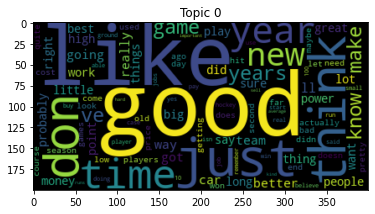

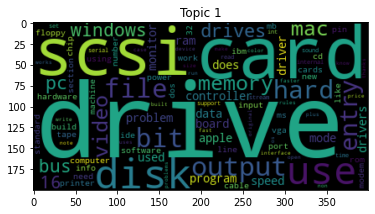

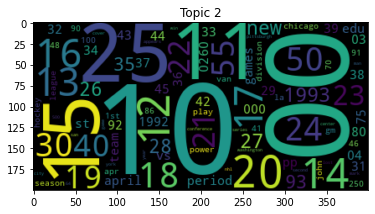

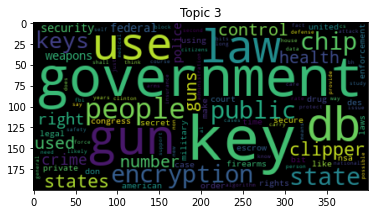

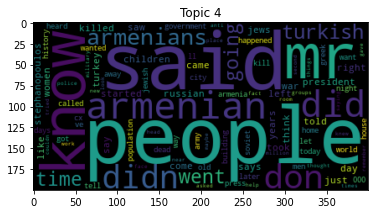

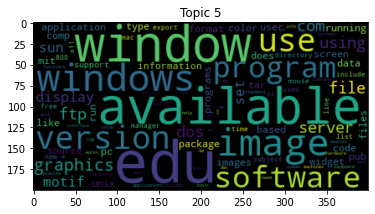

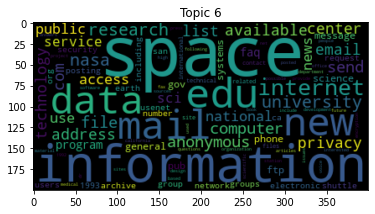

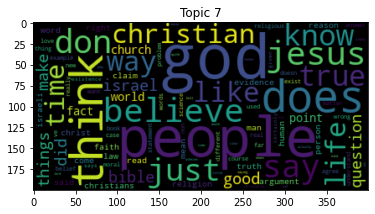

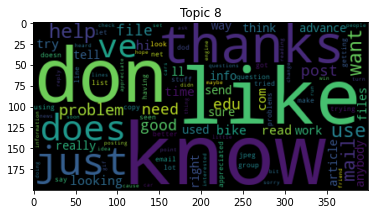

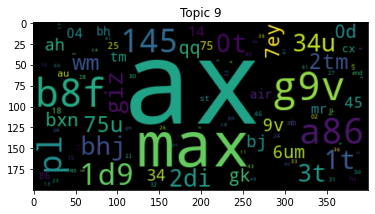

In [27]:
from wordcloud import WordCloud

num_max_word_cloud_words = 100

vocab = tf_vectorizer.get_feature_names_out()
num_topics = len(topic_word_distributions)

for topic_idx in range(num_topics):
    wc = WordCloud(max_words=num_max_word_cloud_words)
    wc.generate_from_frequencies(dict(zip(vocab, topic_word_distributions[topic_idx])))
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Topic %d' % topic_idx)

## Computing co-occurrences of words

Here, we count the number of newsgroup posts in which two words both occur. This part of the demo should feel like a review of co-occurrence analysis from earlier in the course, except now we use scikit-learn's built-in CountVectorizer. Conceptually everything else in the same as before.

In [28]:
word1 = 'year'
word2 = 'team'

word1_column_idx = tf_vectorizer.vocabulary_[word1]
word2_column_idx = tf_vectorizer.vocabulary_[word2]

In [29]:
np.array(tf.todense())

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
tf[:, word1_column_idx].toarray()

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [31]:
documents_with_word1 = (tf[:, word1_column_idx].toarray().flatten() > 0)

In [32]:
documents_with_word2 = (tf[:, word2_column_idx].toarray().flatten() > 0)

In [33]:
documents_with_both_word1_and_word2 = documents_with_word1 * documents_with_word2

Next, we compute the log of the conditional probability of word 1 appearing given that word 2 appeared, where we add in a little bit of a fudge factor in the numerator (in this case, it's actually not needed but some times you do have two words that do not co-occur for which you run into a numerical issue due to taking the log of 0).

In [34]:
eps = 0.1
np.log2((documents_with_both_word1_and_word2.sum() + eps) / documents_with_word2.sum())

-1.5482462194376105

In [35]:
def log_prob_see_word1_given_see_word2(word1, word2, vectorizer, eps=0.1):
    word1_column_idx = vectorizer.vocabulary_[word1]
    word2_column_idx = vectorizer.vocabulary_[word2]
    documents_with_word1 = (tf[:, word1_column_idx].toarray().flatten() > 0)
    documents_with_word2 = (tf[:, word2_column_idx].toarray().flatten() > 0)
    documents_with_both_word1_and_word2 = documents_with_word1 * documents_with_word2
    return np.log2((documents_with_both_word1_and_word2.sum() + eps) / documents_with_word2.sum())

## Topic coherence

The below code shows how one implements the topic coherence calculation from lecture.

In [36]:
def compute_average_coherence(topic_word_distributions, num_top_words, vectorizer, verbose=True):
    vocab = vectorizer.get_feature_names_out()
    num_topics = len(topic_word_distributions)
    average_coherence = 0
    for topic_idx in range(num_topics):
        if verbose:
            print('[Topic ', topic_idx, ']', sep='')
        
        sort_indices = np.argsort(topic_word_distributions[topic_idx])[::-1]
        coherence = 0.
        for top_word_idx1 in sort_indices[:num_top_words]:
            word1 = vocab[top_word_idx1]
            for top_word_idx2 in sort_indices[:num_top_words]:
                word2 = vocab[top_word_idx2]
                if top_word_idx1 != top_word_idx2:
                    coherence += log_prob_see_word1_given_see_word2(word1, word2, vectorizer, 0.1)
        
        if verbose:
            print('Coherence:', coherence)
            print()
        average_coherence += coherence
    average_coherence /= num_topics
    if verbose:
        print('Average coherence:', average_coherence)
    return average_coherence

In [37]:
compute_average_coherence(topic_word_distributions, num_top_words, tf_vectorizer, True)

[Topic 0]
Coherence: -883.433278037819

[Topic 1]
Coherence: -1204.9568944144453

[Topic 2]
Coherence: -658.5193466692967

[Topic 3]
Coherence: -1262.9416512877067

[Topic 4]
Coherence: -1120.0387743529964

[Topic 5]
Coherence: -1068.283511244093

[Topic 6]
Coherence: -1018.020273866717

[Topic 7]
Coherence: -874.4985384459782

[Topic 8]
Coherence: -982.6298329129335

[Topic 9]
Coherence: -228.56240302255796

Average coherence: -930.1884504254543


-930.1884504254543

## Number of unique words

The below code shows how one implements the number of unique words calculation from lecture.

In [38]:
def compute_average_num_unique_words(topic_word_distributions, num_top_words, vectorizer, verbose=True):
    vocab = vectorizer.get_feature_names_out()
    num_topics = len(topic_word_distributions)
    average_number_of_unique_top_words = 0
    for topic_idx1 in range(num_topics):
        if verbose:
            print('[Topic ', topic_idx1, ']', sep='')
        
        sort_indices1 = np.argsort(topic_word_distributions[topic_idx1])[::-1]
        num_unique_top_words = 0
        for top_word_idx1 in sort_indices1[:num_top_words]:
            word1 = vocab[top_word_idx1]
            break_ = False
            for topic_idx2 in range(num_topics):
                if topic_idx1 != topic_idx2:
                    sort_indices2 = np.argsort(topic_word_distributions[topic_idx2])[::-1]
                    for top_word_idx2 in sort_indices2[:num_top_words]:
                        word2 = vocab[top_word_idx2]
                        if word1 == word2:
                            break_ = True
                            break
                    if break_:
                        break
            else:
                num_unique_top_words += 1
        if verbose:
            print('Number of unique top words:', num_unique_top_words)
            print()

        average_number_of_unique_top_words += num_unique_top_words
    average_number_of_unique_top_words /= num_topics
    
    if verbose:
        print('Average number of unique top words:', average_number_of_unique_top_words)
    
    return average_number_of_unique_top_words

In [39]:
compute_average_num_unique_words(topic_word_distributions, num_top_words, tf_vectorizer, True)

[Topic 0]
Number of unique top words: 9

[Topic 1]
Number of unique top words: 15

[Topic 2]
Number of unique top words: 19

[Topic 3]
Number of unique top words: 18

[Topic 4]
Number of unique top words: 12

[Topic 5]
Number of unique top words: 13

[Topic 6]
Number of unique top words: 14

[Topic 7]
Number of unique top words: 10

[Topic 8]
Number of unique top words: 8

[Topic 9]
Number of unique top words: 20

Average number of unique top words: 13.8


13.8

## Plotting average coherence vs k (number of topics), and average number of unique words vs k

Next, we plot the average coherence vs k and the average number of unique words vs k. Note that these are *not* the only topic model metrics available (much like how CH index is not the only metric available for clustering).

For both average coherence and average number of unique words, we would like these to be high. In this particular example, it turns out k=2 yields very high values for both but if you look at the topics learned for k=2, they are qualitatively quite bad (basically one topic is gibberish and the other is everything else!). This observation reinforces the important idea that while there exist topic modeling metrics (such as coherence and number of unique words), you should definitely still look at what the learned topics are (e.g., by printing the top words per topic) to help decide on what value of k to use.

Also, keep in mind that the results are in some sense "noisy" since the LDA fitting procedure is random. We're choosing a specific `random_state` seed value but if we try different random seeds, we can get different results. For simplicity, because LDA fitting is quite computationally expensive, we are *not* doing what we did with GMM's where we did many different random initializations. Thus, the conclusions we draw regarding how many topics to use might actually be different with different random initializations.

At least according to average coherence and average number of unique words for the random seed we use, the results below suggests that using k=4 yields average coherence and average number of unique words that are still reasonably high (as good as or almost as good as the k=2 result), and inspecting the topics learned for k=4, they are definitely more interesting than the ones learned for k=2.

From qualitatively looking at topics, the k=5, k=6, and k=7 topics also look decent. When k gets too large (e.g., k=10), there start to be topics that look like there might be too much overlap (such as multiple topics that seem to be about computers).

Note that one of the things to look out for is whether there are "stable" topics, where even for slightly different values of k and different random initializations, LDA keeps finding specific topics (e.g., one on gibberish, one on numbers, etc).

In [40]:
k_values = range(2, 11)
avg_coherences = []
avg_num_unique_words = []

for k in k_values:
    lda_candidate = LatentDirichletAllocation(n_components=k, random_state=0)
    lda_candidate.fit(tf)
    topic_word_distributions = np.array([row / row.sum() for row in lda_candidate.components_])
    print('-' * 80)
    print('Number of topics:', k)
    print()
    print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)
    print()
    print()
    
    avg_coherences.append(compute_average_coherence(topic_word_distributions, num_top_words, tf_vectorizer, False))
    avg_num_unique_words.append(compute_average_num_unique_words(topic_word_distributions, num_top_words, tf_vectorizer, False))

--------------------------------------------------------------------------------
Number of topics: 2

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
ax : 0.6670609408224908
max : 0.048972903563540594
g9v : 0.013114422643457439
b8f : 0.01275949912939879
a86 : 0.010547142707890974
pl : 0.008819612623778257
145 : 0.008816750902213032
1d9 : 0.007305507436215008
db : 0.007159573058301497
1t : 0.005578212142412081
0t : 0.005377089263425005
25 : 0.005211780342996566
bhj : 0.005104981847457375
3t : 0.004773718255446174
34u : 0.004726396579798663
giz : 0.004584428325550535
2di : 0.004537105192677834
55 : 0.004286549836996119
14 : 0.0042470798586189806
wm : 0.004101448384177003

[Topic 1]
people : 0.00898805018321434
like : 0.008724015906915197
don : 0.008445318198979547
just : 0.00811771116509876
know : 0.007726560502119272
use : 0.006807342121575315
time : 0.006601978036055969
think : 0.0065897670065797375
does : 0.00599569573547193
new : 0.0057076

KeyboardInterrupt: 

Text(0, 0.5, 'Average coherence')

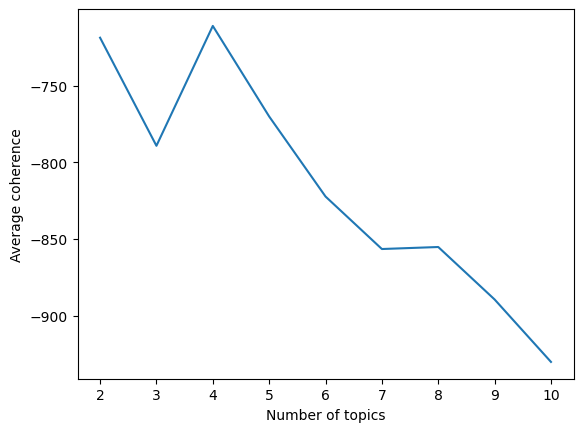

In [39]:
plt.plot(k_values, avg_coherences)
plt.xlabel('Number of topics')
plt.ylabel('Average coherence')

Text(0, 0.5, 'Average number of unique words')

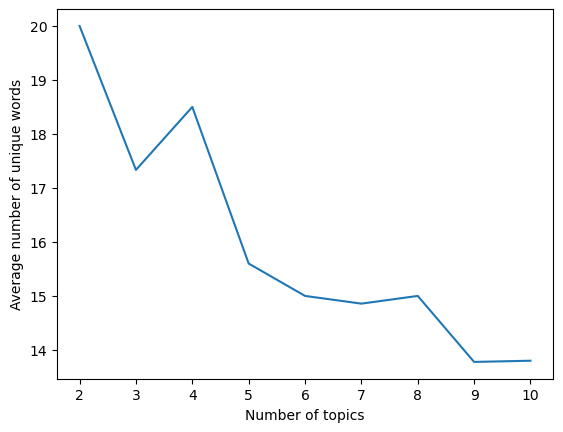

In [40]:
plt.plot(k_values, avg_num_unique_words)
plt.xlabel('Number of topics')
plt.ylabel('Average number of unique words')